# Stock Market Data Visualiser
### A Python-based tool for analysing stock market data

Using the `yfinance` library and creating visualisations for:

- Historical price trends
- Daily return analysis
- Basic statistical metrics

In [8]:
# importing dependencies
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# setting graph style
sns.set_style("darkgrid")

## Data Collections
Loading stock data from Yahoo Finance API for analysis.

### Financial Terms
- **Open Price**: The stock price at market open (9:30 AM EST)
- **Close Price**: The price at market close (4:00 PM EST)
- **High Price**: The highest price reached by the stock during a single day
- **Low Price**: The lowest price reached by the stock during a single day
- **Volume**: Number of shares traded
- **Adjusted Close**: Close price adjusted for splits and dividends
- **Trading Days vs Calendar Days**: Market is close on weekends/holidays so those days are included in trading days

In [10]:
# Feel free to change symbol to see info about other companies
# getting stock data for apple (AAPL) for the last 6 months
symbol = "AAPL"

# fetching data
ticker = yf.Ticker(symbol)
df = ticker.history(period="6mo")

# basic info about chosen symbol
print(f"Analysing {symbol} Stock Data")
print("-" * 50)
print(f"Date range: {df.index[0].strftime('%Y-%m-%d')} to df {df.index[-1].strftime('%Y-%m-%d')}")
print(f"Trading days during this time period: {len(df)}")
print(f"Current Stock Price: {df['Close'].iloc[-1]:.2f}")
print(f"Current Open: {df['Open'].iloc[-1]:.2f}")
print(f"Current High: {df['High'].iloc[-1]:.2f}")
print(f"Current Low: {df['Low'].iloc[-1]:.2f}")

Analysing AAPL Stock Data
--------------------------------------------------
Date range: 2024-05-16 to df 2024-11-15
Trading days during this time period: 128
Current Stock Price: 225.00
Current Open: 226.40
Current High: 226.92
Current Low: 224.27


## Price Analysis
- if Close > Open: Postive day (bulls in control)
- if Open > Close: Negative day (Bears in control)

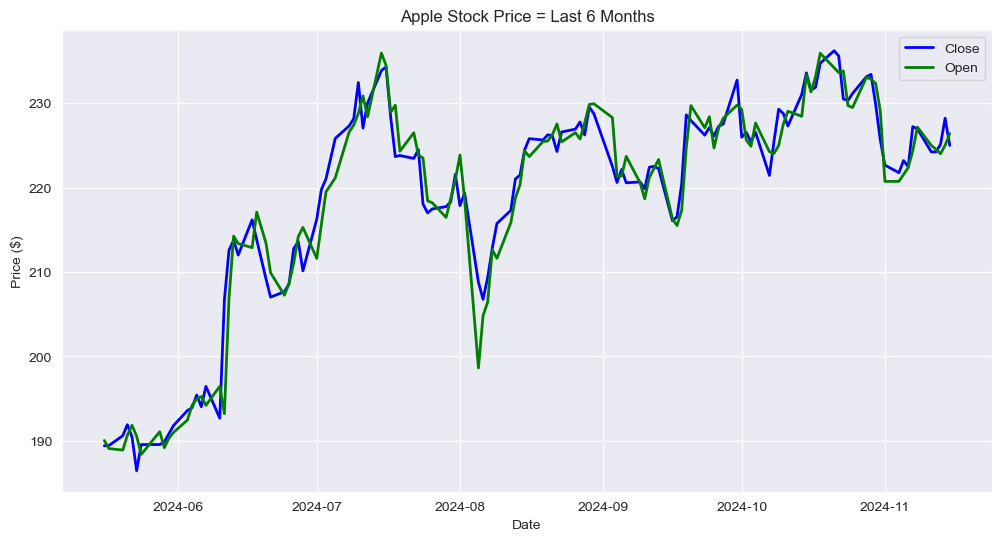

In [14]:
## displaying both the open and close price
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close', color='blue', linewidth=2)
plt.plot(df['Open'], label='Open', color='green', linewidth=2)
plt.title('Apple Stock Price = Last 6 Months')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend() # shows the labels for each line
plt.show()

## Daily Return Analysis
Calulcating and visualising the daily price changes

### Financial terms
- **Daily Return**: The percentage change in price from one day's close to the next
- **Positive Return**: Days when the price increased (green bars)
- **Negative Return**: Days when the price decreased (red bars)

In [17]:
# calculating the daily return
df['Daily_Return'] = ((df['Close'] - df['Open']) / df['Open']) * 100

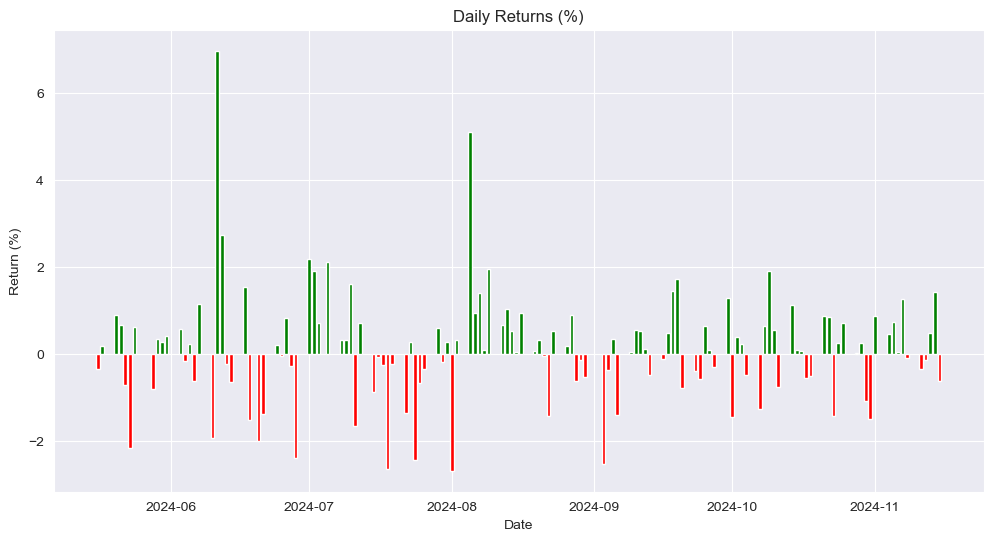

Average Daily Return: 0.13%
Best Day: 6.97%
Worst Day: -2.68%
Volatile Days (>2% movement): 11 days


In [19]:
# visualising the daily return
plt.figure(figsize=(12,6))
plt.bar(df.index, df['Daily_Return'], color=['green' if x > 0 else 'red' for x in df['Daily_Return']])
plt.title('Daily Returns (%)')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.grid(True)
plt.show()

# showing some stats
print(f"Average Daily Return: {df['Daily_Return'].mean():.2f}%") # ':.2f' is just formatting to return the number with 2 decimal places
print(f"Best Day: {df['Daily_Return'].max():.2f}%") 
print(f"Worst Day: {df['Daily_Return'].min():.2f}%")
print(f"Volatile Days (>2% movement): {len(df[df['Daily_Return'].abs() > 2])} days") # how many days have a price return of +2 or -2

## Making it interactive using plotly

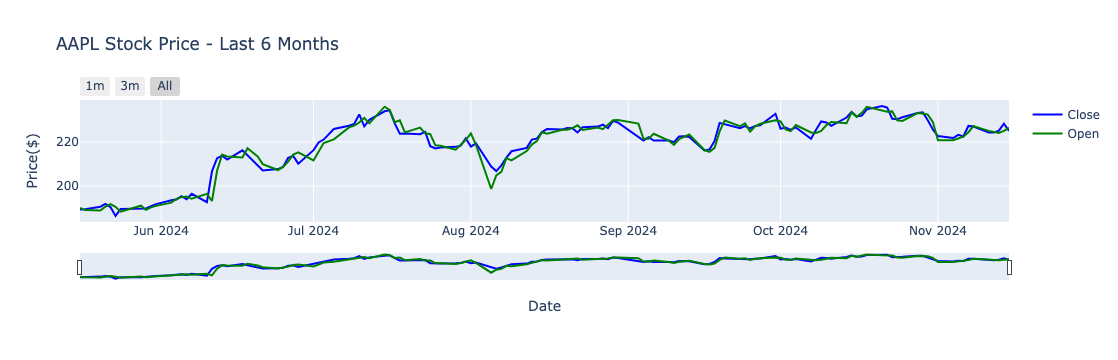

In [31]:
## making the graphs more interactive using plotly
import plotly.graph_objects as go

# creating interactive figure
fig = go.Figure() # lol

# creating Close price trace
fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df['Close'],
        name='Close',
        line=dict(color='blue',width=2),
        hovertemplate="Date: %{x}<br>" +
        "Close: $%{y:.2f}<br>" +
        "<extra></extra>"
    )
)


# creating Open price trace
fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df['Open'],
        name='Open',
        line=dict(color='green',width=2),
        hovertemplate="Date: %{x}<br>" +
        "Open: $%{y:.2f}<br>" +
        "<extra></extra>"
    )
)

# updating layout
fig.update_layout(
    title=f'{symbol} Stock Price - Last 6 Months',
    yaxis_title='Price($)',
    xaxis_title='Date',
    height=600,
    hovermode='x unified', # type of hover interaction - shows ALL values grouped in one box (Open, Close)
    showlegend=True
)


# adding range selector buttons
fig.update_xaxes(
    rangeslider_visible=True, # shows the slider at the bottom
    rangeselector=dict(
        buttons=list([
            # last 1 month of data
            dict(count=1, label="1m", step="month", stepmode="backward"), # counting backwards from out current data, showing us the "last x months" of data
            # last 3 months of data
            dict(count=3, label="3m", step="month", stepmode="backward"), 
            # all data
            dict(step="all", label="All"),
        ])
    )
)

fig.show()

## Candelstick Chart
1. Green Candle (Price went up):
   - Bottom of body = Open price
   - Top of body = Close price
   - Top wick = High price
   - Bottom wick = Low price

2. Red Candle (Price went down):
   - Top of body = Open price
   - Bottom of body = Close price
   - Top wick = High price
   - Bottom wick = Low price

3. What it tells you:
   - Long body = Strong price movement
   - Long wicks = High volatility
   - Short body = Small price change
   - No body (doji) = Indecision in the market

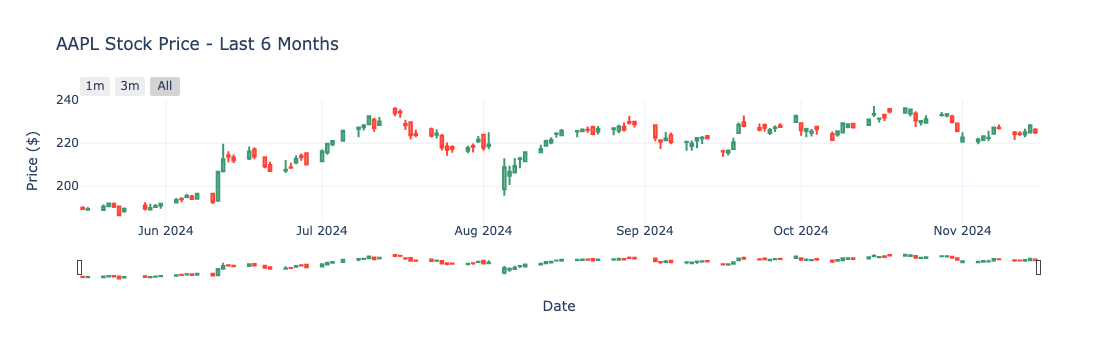

In [29]:
# creating the candlestick chart
fig = go.Figure(data=[
    go.Candlestick(
        x=df.index,
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        name='OHLC'  # OHLC = Open, High, Low, Close
    )
])

# update the layout for better viewing
fig.update_layout(
    title=f'{symbol} Stock Price - Last 6 Months',
    yaxis_title='Price ($)',
    xaxis_title='Date',
    height=600,
    
    # template for a white background with grid
    template='plotly_white',
    
    # fhow full candle info when hovering
    hovermode='x unified'
)

# add our range selector and slider
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(step="all", label="All")
        ])
    )
)
fig.show()
